___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [13]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 13.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=e5b903ac1a6e92d16aa50a8fd1734092b25af340dbcf483a151cc26f5f323e58
  Stored in directory: c:\users\ajay biradar\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [2]:
!pip install pandas_datareader

In [14]:
import yfinance as yf

In [67]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [36]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [43]:
BAC = yf.download("BAC", start, end)
C = yf.download("C", start, end)
GS = yf.download("GS", start, end)
JPM = yf.download("JPM", start, end)
MS = yf.download("MS", start, end)
WFC = yf.download("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [44]:
BAC.head()

Price,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC
Date,,,,,
2006-01-03,31.173681,31.239895,30.557888,31.067736,16296700
2006-01-04,30.842600,31.279614,30.756521,31.120699,17757900
2006-01-05,30.882334,31.008142,30.670448,30.842607,14970700
2006-01-06,30.835981,31.061110,30.690309,30.988274,12599800
2006-01-09,30.855852,31.100847,30.696939,30.935311,15619400


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [19]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [50]:
bank_data = {
    'BAC': BAC,
    'C': C,
    'GS': GS,
    'JPM': JPM,
    'MS': MS,
    'WFC': WFC
}

# Standard column names you want at level 1
stock_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Fix each DataFrame before concatenation
for ticker in tickers:
    df = bank_data[ticker]
    
    # If the DataFrame has 5 columns (missing "Open" or others), correct as needed
    if len(df.columns) != len(stock_columns):
        raise ValueError(f"{ticker} DataFrame has incorrect number of columns: {df.columns}")
    
    # Set correct column names
    df.columns = stock_columns
    df.columns.name = None  # Remove column name if any

# Concatenate with proper MultiIndex structure
bank_stocks = pd.concat([bank_data[ticker] for ticker in tickers], axis=1, keys=tickers)


** Set the column name levels (this is filled out for you):**

In [52]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [53]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info        Open       High        Low      Close    Volume        Open   
Date                                                                            
2006-01-03   31.173681  31.239895  30.557888  31.067736  16296700  324.013153   
2006-01-04   30.842600  31.279614  30.756521  31.120699  17757900  318.031158   
2006-01-05   30.882334  31.008142  30.670448  30.842607  14970700  319.608795   
2006-01-06   30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09   30.855852  31.100847  30.696939  30.935311  15619400  318.096924   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low       Close   Volume  ...       Open   
Date                                                      ...              
2006-01-03   324.604774  316.256303  322.106811  1537600  ...  31.934696   
2006-01-04   322.764164  317.833958  321.186502  1870960  ...  31.956593   
2006-01-05   320.660556  318.162594  318.425534  1143160  ...  32.044220   
2006-01-06   321.449397  316.847872  321.317917  1370210  ...  32.077076   
2006-01-09   320.397687  317.505303  319.477386  1680740  ...  32.416637   

Bank Ticker                                                  WFC             \
Stock Info        High        Low      Close   Volume       Open       High   
Date                                                                          
2006-01-03   32.033277  31.074853  31.310350  5377000  18.778109  18.822258   
2006-01-04   32.465927  31.956593  32.148279  7977800  18.560310  18.731020   
2006-01-05   32.088035  31.775862  32.066127  5778000  18.539709  18.575028   
2006-01-06   32.230423  31.792287  32.186611  6889800  18.648605  18.704527   
2006-01-09   32.471406  32.104465  32.109943  4144500  18.645660  18.733960   

Bank Ticker                                  
Stock Info         Low      Close    Volume  
Date                                         
2006-01-03   18.363107  18.601512  11016400  
2006-01-04   18.463182  18.719247  10870000  
2006-01-05   18.430807  18.542652  10158000  
2006-01-06   18.474952  18.589740   8403800  
2006-01-09   18.575022  18.645660   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [54]:
bank_stocks.xs(key='Close', axis= 1, level= 'Stock Info').max()

Bank Ticker
BAC     37.656672
C      387.593985
GS     182.796214
JPM     53.687864
MS      50.885223
WFC     44.426956
dtype: float64

In [59]:
# To verify
bank_stocks.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           16.472606    16.700326    16.261335    16.494820  1.335182e+08   
std            10.186214    10.253123    10.114329    10.186668  1.278983e+08   
min             2.470940     2.762101     1.985461     2.533894  4.835400e+06   
25%             9.735371     9.879241     9.640604     9.759137  4.841140e+07   
50%            12.656764    12.787085    12.508418    12.654963  1.013807e+08   
75%            24.748772    25.343053    23.939505    24.714467  1.752131e+08   
max            37.699570    37.878372    37.556524    37.656672  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          102.796508   104.264281   101.523476   103.012887  2.842989e+07   
std           120.667680   121.765904   119.676377   120.780267  2.829885e+07   
min             7.724914     8.103582     7.346241     7.724910  6.328600e+05   
25%            29.839359    30.369484    29.384956    29.915093  1.007374e+07   
50%            37.488522    37.918815    37.109870    37.493237  2.183960e+07   
75%           144.833786   150.504757   140.879056   146.257348  3.869114e+07   
max           386.292755   390.333165   383.135567   387.593985  3.772638e+08   

Bank Ticker  ...           MS                                         \
Stock Info   ...         Open         High          Low        Close   
count        ...  2517.000000  2517.000000  2517.000000  2517.000000   
mean         ...    24.229434    24.605077    23.846028    24.240630   
std          ...     9.957865    10.028631     9.883623     9.962405   
min          ...     6.460619     7.169887     4.654050     6.374176   
25%          ...    17.308146    17.640702    16.918219    17.215066   
50%          ...    22.207857    22.490328    21.881449    22.191869   
75%          ...    29.520937    29.892470    29.122153    29.573914   
max          ...    50.061153    50.986130    49.517375    50.885223   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.758182e+07    24.479453    24.760704    24.190240    24.479297   
std          1.676122e+07     8.412531     8.375393     8.454947     8.411693   
min          1.120500e+06     5.415465     5.962347     5.202048     5.768937   
25%          8.728000e+06    18.809809    19.111136    18.521770    18.830355   
50%          1.389980e+07    21.579409    21.833355    21.360050    21.598448   
75%          2.163520e+07    29.558477    29.780507    29.292511    29.537707   
max          3.297861e+08    44.268101    44.457215    43.927692    44.426956   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.295450e+07  
std          3.575351e+07  
min          2.392000e+06  
25%          1.378800e+07  
50%          2.316030e+07  
75%          3.798820e+07  
max          4.787366e+08  

[8 rows x 30 columns]

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [61]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [62]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.001705,-0.002857,0.005131,0.007266,0.026762,0.006329
2006-01-05,-0.008936,-0.008596,-0.010601,-0.004274,-0.002555,-0.009434
2006-01-06,0.004723,0.009083,0.010238,0.007826,0.003757,0.002539
2006-01-09,-0.001709,-0.005728,0.009506,-0.001001,-0.002382,0.003008


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

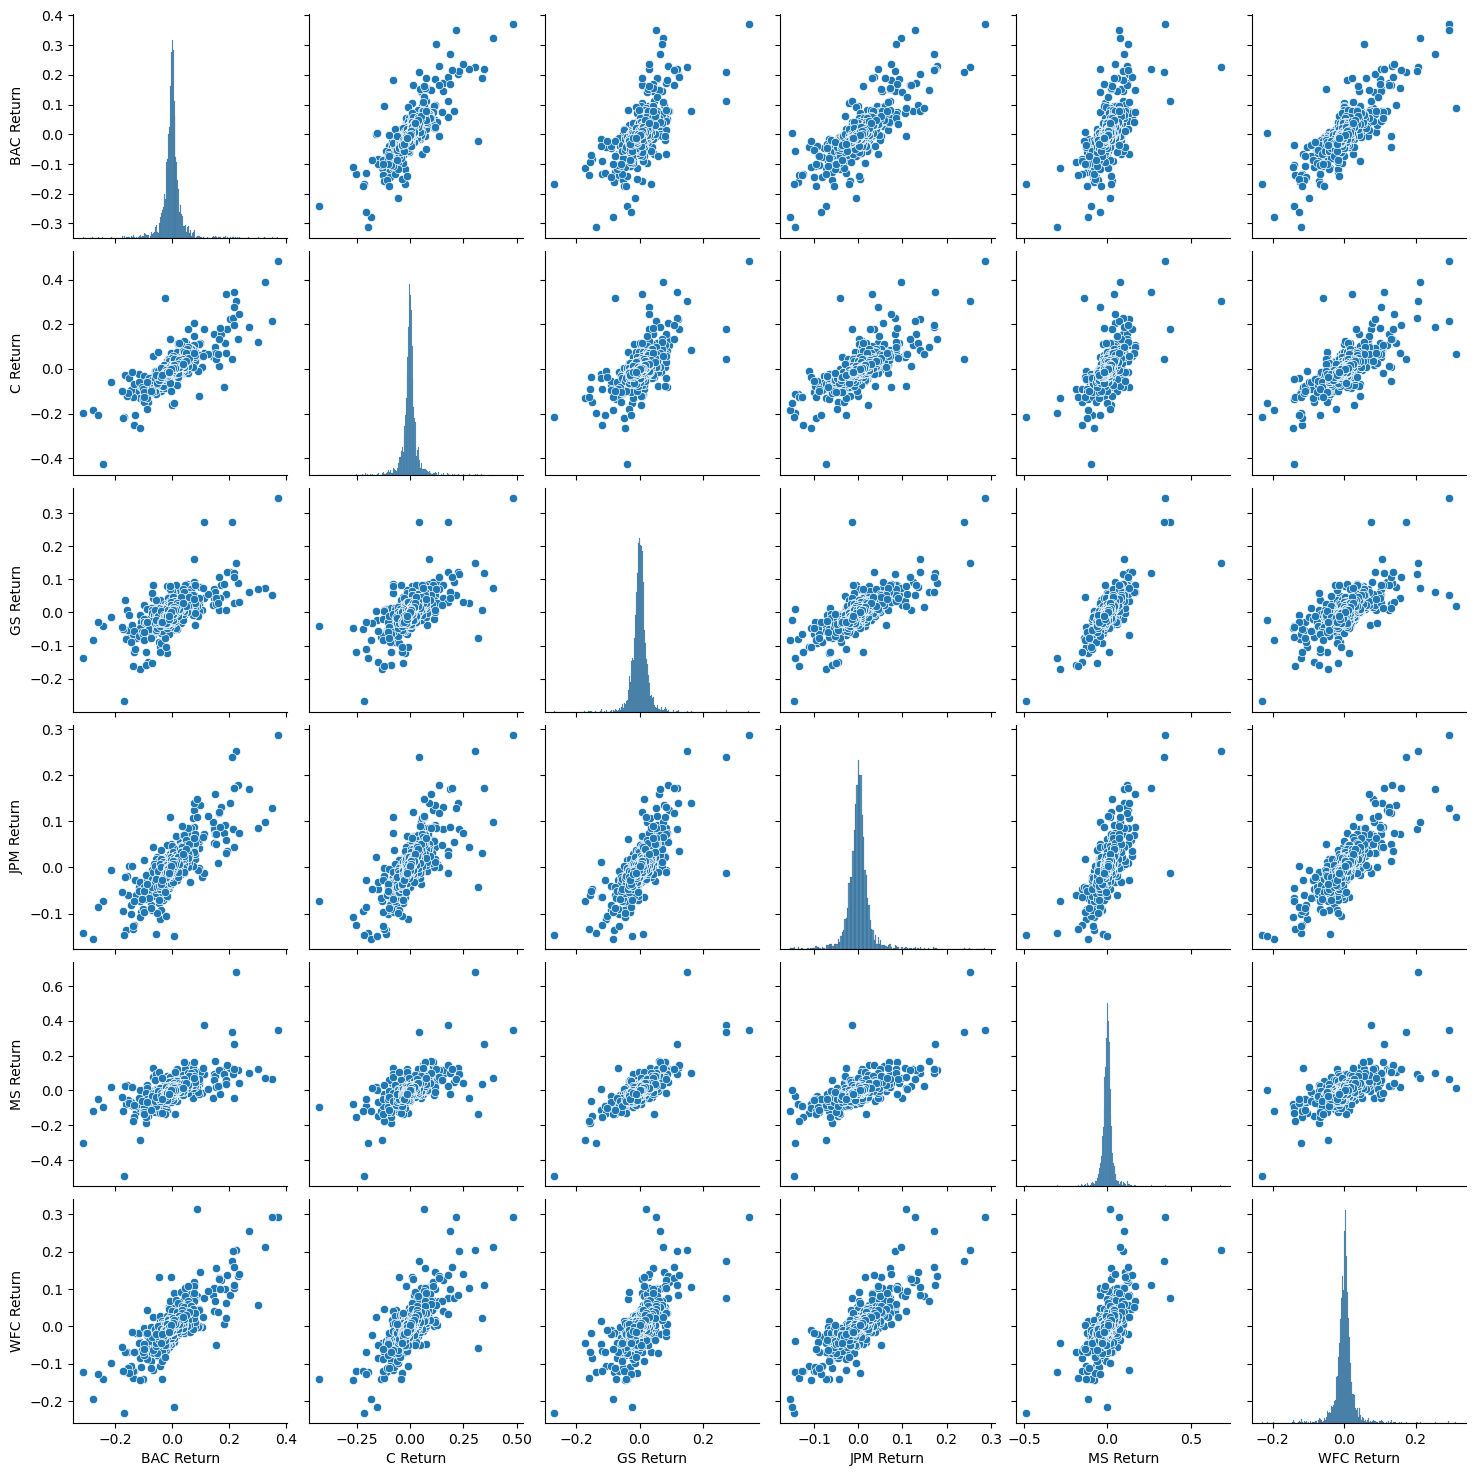

In [69]:
import seaborn as sns
sns.pairplot(returns[1:])
plt.show()

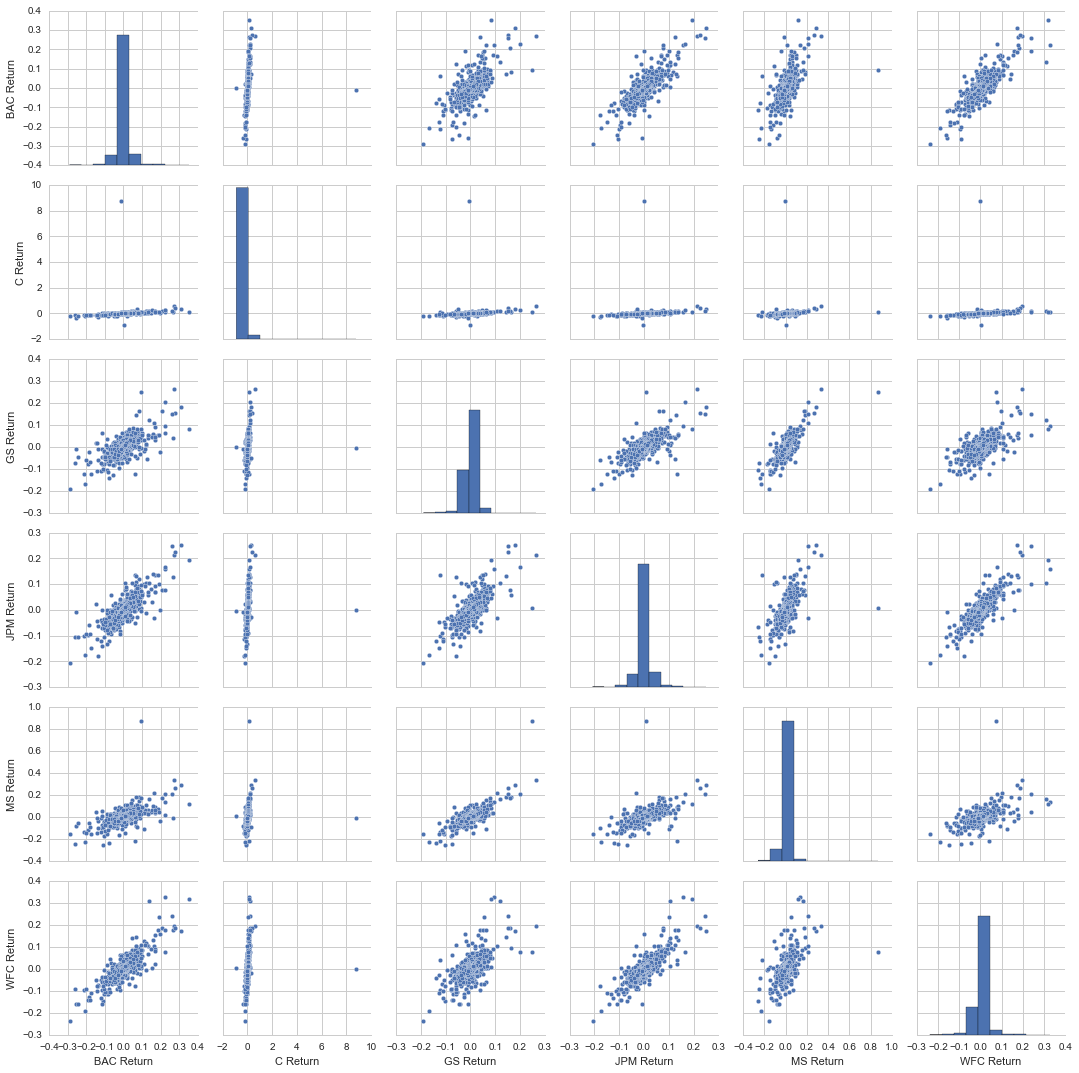

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [70]:
returns.idxmin()

BAC Return   2008-10-08
C Return     2009-02-27
GS Return    2008-10-10
JPM Return   2009-01-20
MS Return    2008-10-10
WFC Return   2008-10-10
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that JMP and MS has largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [71]:
returns.idxmin()

BAC Return   2008-10-08
C Return     2009-02-27
GS Return    2008-10-10
JPM Return   2009-01-20
MS Return    2008-10-10
WFC Return   2008-10-10
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [73]:
returns.std()

BAC Return    0.038732
C Return      0.040327
GS Return     0.026534
JPM Return    0.027308
MS Return     0.037844
WFC Return    0.029934
dtype: float64

In [75]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016451
C Return      0.015965
GS Return     0.013547
JPM Return    0.014406
MS Return     0.017265
WFC Return    0.014185
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

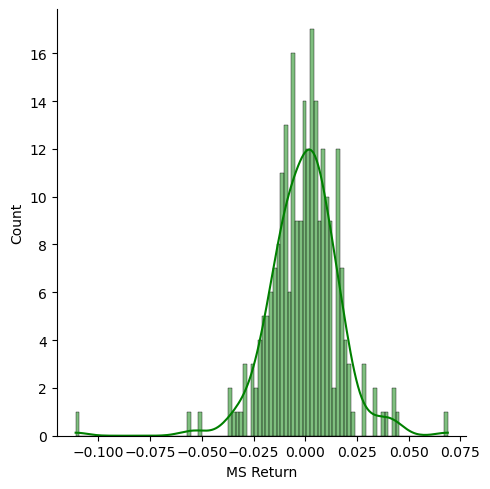

In [81]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=100, kde=True)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

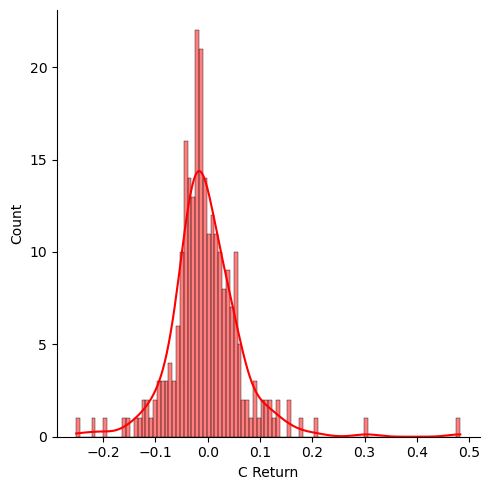

In [83]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=100, kde=True)
plt.show()

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



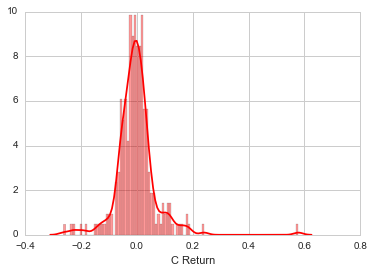

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [85]:
!pip install cufflinks

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68721 sha256=aa622492e164bbefb21f2fd1166c381190eaa30a05c15be0285879917f6e04e4
  Stored in directory: c:\users\ajay biradar\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

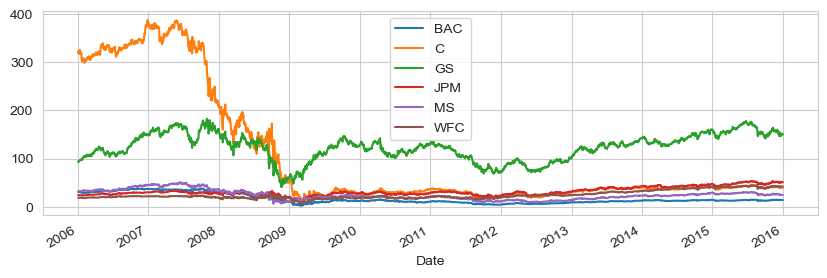

In [91]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(10,3),label=tick)
plt.legend()
plt.show()

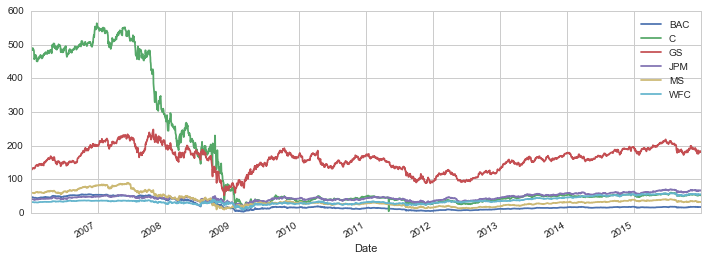

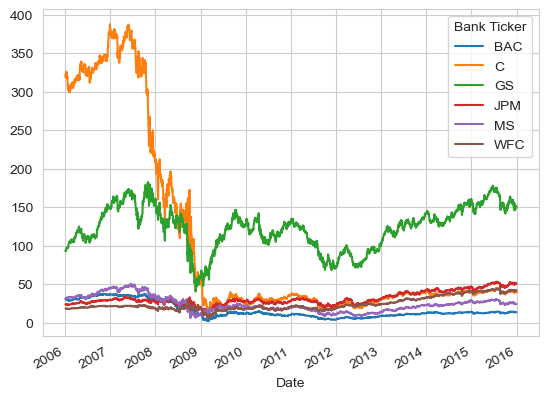

In [92]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()

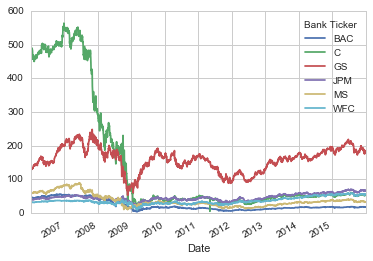

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

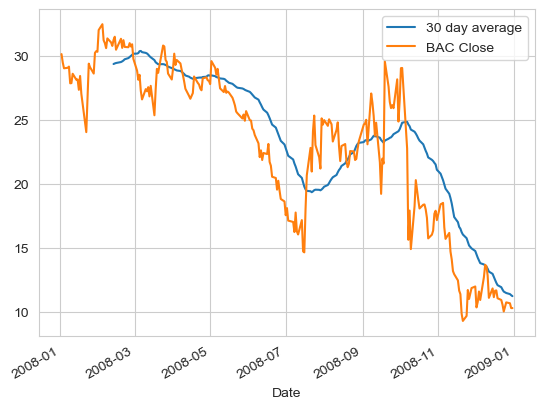

In [107]:
BACM = BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean()
BACM.plot(label="30 day average", legend=True)
BACN = BAC['Close'].loc['2008-01-01':'2009-01-01']
BACN.plot(label='BAC Close', legend=True)
plt.show()

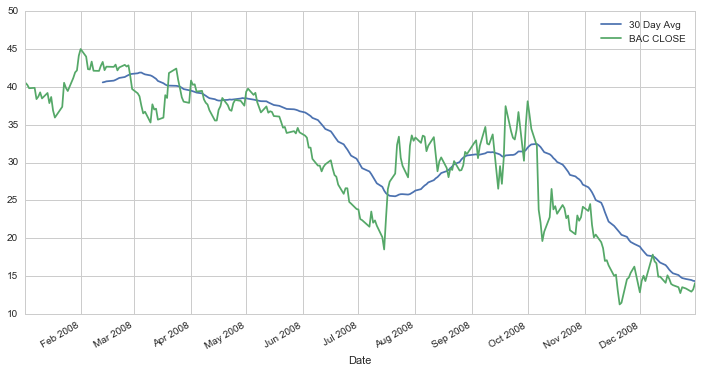

** Create a heatmap of the correlation between the stocks Close Price.**

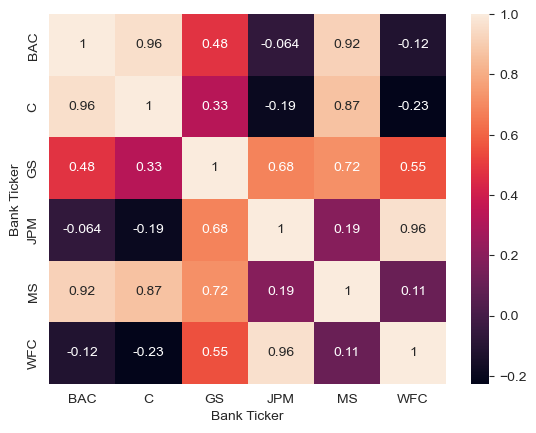

In [115]:
Close_Corr= bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.heatmap(Close_Corr, annot=True)
plt.show()

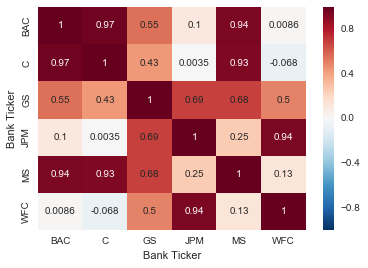

** Optional: Use seaborn's clustermap to cluster the correlations together:**

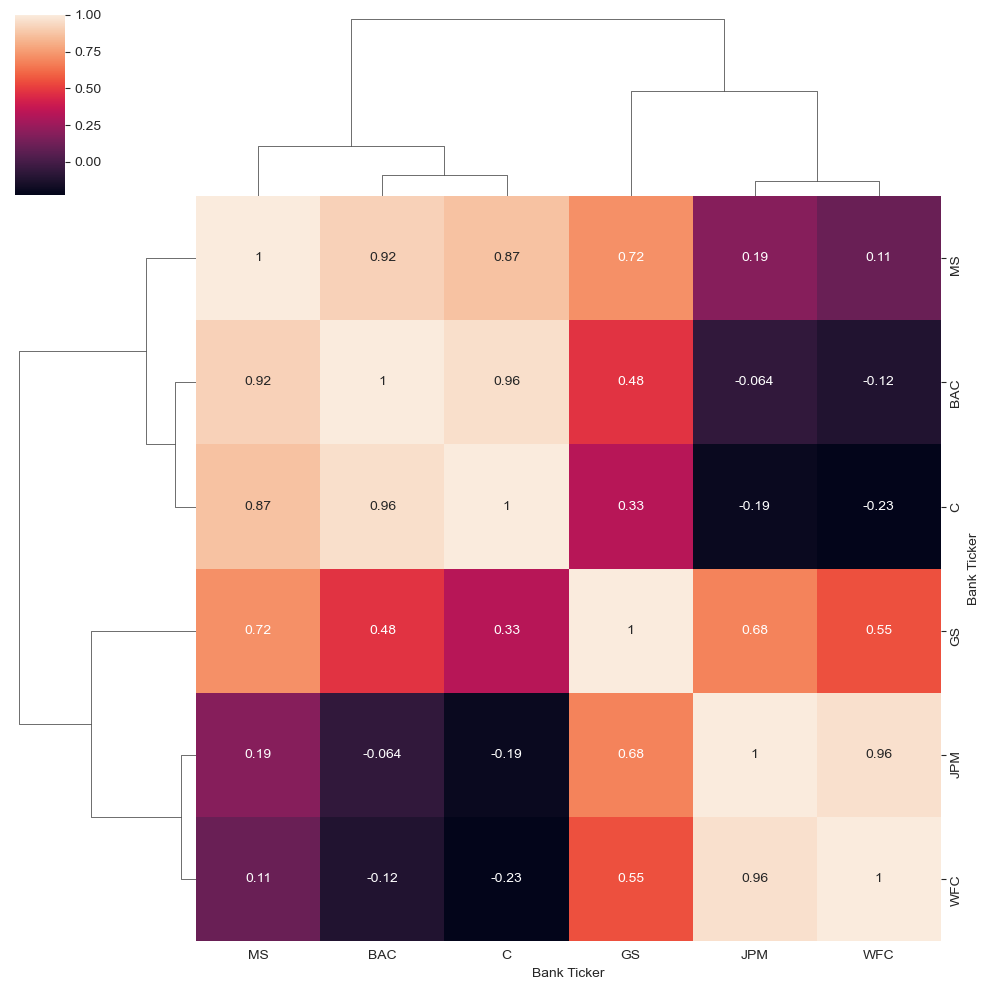

In [118]:
sns.clustermap(Close_Corr, annot=True)
plt.show()

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

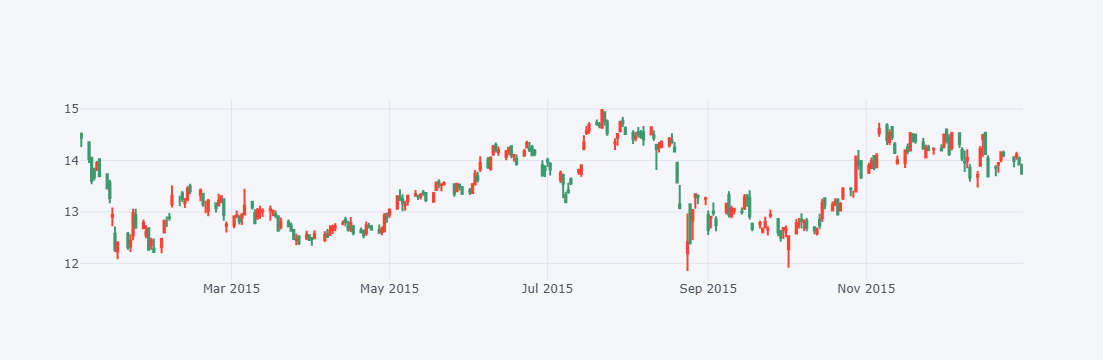

In [119]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

C:\Users\Ajay biradar\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\Ajay biradar\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



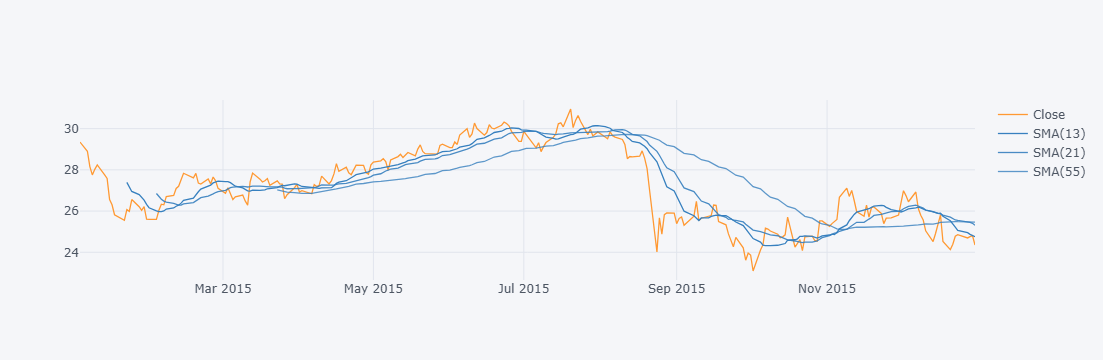

In [121]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

C:\Users\Ajay biradar\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



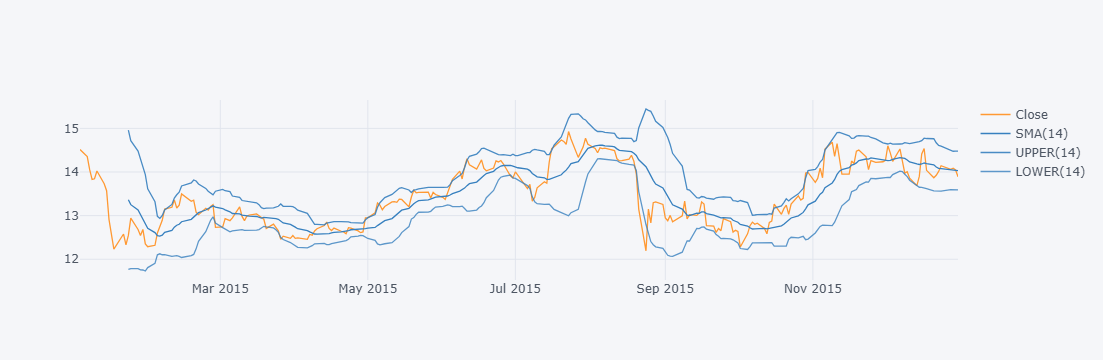

In [123]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.